In [25]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import translate

from plane2d import Plane2d

def plot_plane(ax, plane, color='blue', label='Plane'):
    ax.plot(*plane.origin, 'o', color=color)

    ax.arrow(*plane.origin, *(plane.x_axis * 0.9), head_width=0.3, head_length=0.3, fc=color, ec=color)
    ax.arrow(*plane.origin, *(plane.y_axis * 0.9), head_width=0.3, head_length=0.3, fc=color, ec=color)
    
    ax.text(*(plane.origin + plane.x_axis), 'X', color=color, fontsize=12)
    ax.text(*(plane.origin + plane.y_axis), 'Y', color=color, fontsize=12)
    ax.set_title(label)
    
def plot_infinite_axes(ax):
    ax.axhline(y=0, color='gray', linestyle='--')
    ax.axvline(x=0, color='gray', linestyle='--')
    
    ax.text(*(0, 0), "(0, 0)", color="black", fontsize=12, verticalalignment="top", horizontalalignment="center")

def draw_dotted_lines_to_vertices(ax, origin, polygon, line_color="gray"):
    for pi, point in enumerate(polygon.exterior.coords[:-1]):
        ax.plot([origin[0], point[0]], [origin[1], point[1]], linestyle=':', color=line_color, alpha=0.5)
        
        ax.text(*(point), str(pi), color="red", verticalalignment="bottom")
        
def draw_transformation_lines(ax, origin_plane, target_plane, polygon, line_color="purple"):
    for point in polygon.exterior.coords[:-1]:
        relative_point = np.array(point) - origin_plane.origin
        new_x = np.dot(relative_point, origin_plane.x_axis) * target_plane.x_axis
        new_y = np.dot(relative_point, origin_plane.y_axis) * target_plane.y_axis
        converted_point = target_plane.origin + new_x + new_y

        ax.plot([point[0], converted_point[0]], [point[1], converted_point[1]], linestyle=':', color=line_color, alpha=0.7)

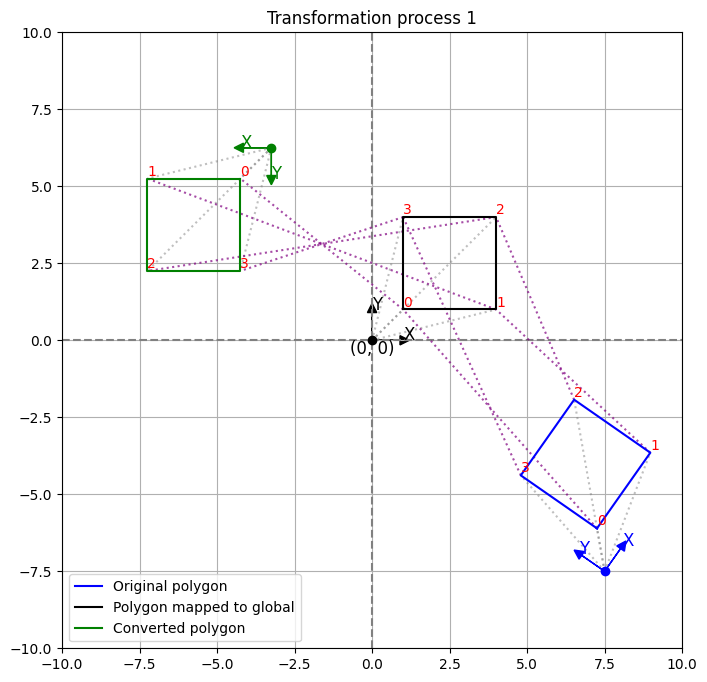

In [29]:
plane_original = Plane2d(np.array([7.5, -7.5]), np.array([1, 0]), np.array([0, 1]), normalize=True).get_rotated_plane(degree=-55)
plane_original_polygon = Polygon(
    [
        plane_original.origin, 
        plane_original.origin + plane_original.x_axis * 3,
        plane_original.origin + plane_original.x_axis * 3 + plane_original.y_axis * 3,
        plane_original.origin + plane_original.y_axis * 3
    ]
)

plane_original_polygon = translate(
    plane_original_polygon,
    *(plane_original.x_axis + plane_original.y_axis)
)


plane_to_convert = Plane2d(np.array([-3.25, 6.25]), np.array([-1, 0]), np.array([0, -1]))
plane_to_convert_polygon = plane_original.get_converted_geometry_by_plane(plane_to_convert, plane_original_polygon)

plane_to_convert_origin = Plane2d(np.array([0, 0]), x_axis=np.array([1, 0]), y_axis=np.array([0, 1]))
plane_to_convert_origin_polygon = plane_original.get_converted_geometry_by_plane(plane_to_convert_origin, plane_original_polygon)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

plot_infinite_axes(ax)
draw_dotted_lines_to_vertices(ax, plane_original.origin, plane_original_polygon)
draw_dotted_lines_to_vertices(ax, plane_to_convert.origin, plane_to_convert_polygon)
draw_dotted_lines_to_vertices(ax, plane_to_convert_origin.origin, plane_to_convert_origin_polygon)


draw_transformation_lines(ax, plane_original, plane_to_convert_origin, plane_original_polygon)
draw_transformation_lines(ax, plane_to_convert_origin, plane_to_convert, plane_to_convert_origin_polygon)


plot_plane(ax, plane_original, color='blue', label='')
plot_plane(ax, plane_to_convert, color='green', label='')
plot_plane(ax, plane_to_convert_origin, color='black', label='Transformation process 1')

ax.plot(*plane_original_polygon.exterior.xy, color='blue', label='Original polygon')
ax.plot(*plane_to_convert_origin_polygon.exterior.xy, color='black', label='Polygon mapped to global')
ax.plot(*plane_to_convert_polygon.exterior.xy, color='green', label='Converted polygon')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.legend(loc="lower left")
ax.grid(True)
plt.show()

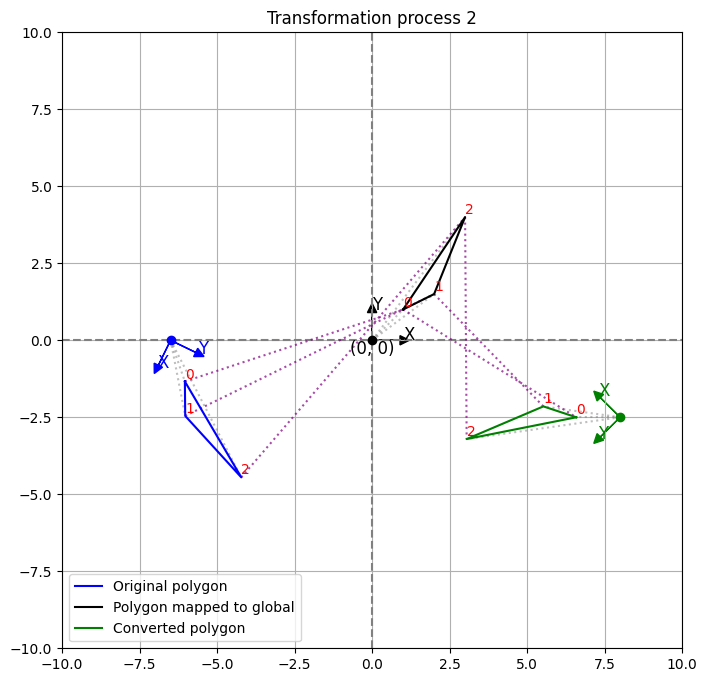

In [30]:
plane_original = Plane2d(np.array([-6.5, 0]), np.array([1, 0]), np.array([0, 1]), normalize=True).get_rotated_plane(degree=116)
plane_original_polygon = Polygon(
    [
        plane_original.origin, 
        plane_original.origin + plane_original.x_axis + plane_original.y_axis * 0.5,
        plane_original.origin + plane_original.x_axis * 2 + plane_original.y_axis * 3,
    ]
)

plane_original_polygon = translate(
    plane_original_polygon,
    *(plane_original.x_axis + plane_original.y_axis)
)


plane_to_convert = Plane2d(np.array([8, -2.5]), np.array([-1, 0]), np.array([0, -1])).get_rotated_plane(degree=45)
plane_to_convert_polygon = plane_original.get_converted_geometry_by_plane(plane_to_convert, plane_original_polygon)

plane_to_convert_origin = Plane2d(np.array([0, 0]), x_axis=np.array([1, 0]), y_axis=np.array([0, 1]))
plane_to_convert_origin_polygon = plane_original.get_converted_geometry_by_plane(plane_to_convert_origin, plane_original_polygon)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

plot_infinite_axes(ax)
draw_dotted_lines_to_vertices(ax, plane_original.origin, plane_original_polygon)
draw_dotted_lines_to_vertices(ax, plane_to_convert.origin, plane_to_convert_polygon)
draw_dotted_lines_to_vertices(ax, plane_to_convert_origin.origin, plane_to_convert_origin_polygon)


draw_transformation_lines(ax, plane_original, plane_to_convert_origin, plane_original_polygon)
draw_transformation_lines(ax, plane_to_convert_origin, plane_to_convert, plane_to_convert_origin_polygon)


plot_plane(ax, plane_original, color='blue', label='')
plot_plane(ax, plane_to_convert, color='green', label='')
plot_plane(ax, plane_to_convert_origin, color='black', label='Transformation process 2')

ax.plot(*plane_original_polygon.exterior.xy, color='blue', label='Original polygon')
ax.plot(*plane_to_convert_origin_polygon.exterior.xy, color='black', label='Polygon mapped to global')
ax.plot(*plane_to_convert_polygon.exterior.xy, color='green', label='Converted polygon')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.legend(loc="lower left")
ax.grid(True)
plt.show()